In [1]:
using LinearAlgebra, Plots

<div style="width:100%;color:darkred;text-align:center;font-size:45px;height:45px;"><strong>Metric Spaces</strong></div>

In [ ]:
html"<iframe width=\"400\" height=\"200\" src=\"https://www.youtube.com/embed/-fQlMWWnp_g\"  frameborder=\"0\" allow=\"accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture\" allowfullscreen></iframe>"

# 1. Inner Products

## 1.1 Inner Products and Metrics in $\mathbb{R}^n$

##### **Motivation**

The notion of "distance" is not restricted to Euclidean length. E.g.,
* we might be interested in travel time
* different directions might be more difficult<br> (climb up/ stay on the valley floor)

We will use the **notation $\quad <u,v> \quad $ for the inner product,** rather than $\quad u \cdot v$

#### **Examples:**

> Different cost along the coordinate axes
> * $
u=\begin{pmatrix} u_1 \\ u_2 \\ u_3 \end{pmatrix}, \quad
v=\begin{pmatrix} v_1 \\ v_2 \\ v_3 \end{pmatrix}, \quad
< u, v > = 3\ u_1 v_1  + 2\ u_2 v_2 +\ u_3 v_3.
$
>
> * **Norm:**   $\quad\; \lVert{u} \rVert = \sqrt{\ 3\ u_1^2  + 2\ u_2^2 +\ u_3^2 } $
> * **Metric:** $\quad d(u,v) = \lVert v-u \rVert.$

> Different cost in some direction
>$
u \in \mathbb{R}^n, \quad
u \in \mathbb{R}^n, \quad
< u, v > = u^t C v,
$
>  where $C$ is a matrix of size $n \times n$.
>
>  The requirement that $<u,v>$ must be positive definite places restrictions on $C$ 
>
>
> * **Norm:**   $\quad\; \lVert{u}\rVert = \sqrt{\ u^t C u } $<br><br>
> * **Metric:** $\quad d(u,v) = \lVert v - u \rVert. $

## 1.2  Inner Products in Function Spaces

##### **Functions are Vectors:**

> We can think of a vector $u \in \mathbb{R}^n$ as a **function that maps an index $i = 1,2, \dots n$ to an entry $u_i$ of $u$.**
>
> We can generalize this to **a function $f$ that maps an index $x$ in some domain to a value $f(x).$**

>  $\begin{align}
f(x)   &= x^2 + 1,\quad x \in \left[ -1, 3 \right],                  & \text{ a vector in } \mathscr{F}\left[ -1, 3 \right] \quad\quad\quad\quad \\
f_s(x) &= x^2 + 1,\quad x \in \left\{ -1, 0, \frac{1}{2}, 2 \right\},& \text{ a vector in } \mathbb{R}^4 :\quad ( 2,\ 1,\ \frac{5}{4},\ 5 )
\end{align}$

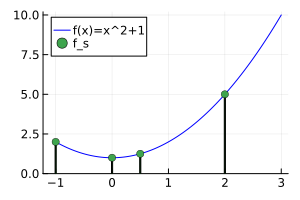

In [2]:
f(x) = x*x + 1

x    = range(-1, stop=3, length=100);  y   = f.(x)
x_s  = [ -1; 0; 1//2; 2];              y_s = f.(x_s)

plot( x,   y,   label="f(x)=x^2+1", color=:blue)
plot!(x_s, y_s, t=:bar, bar_width=0.02, color=:green, label=:none)
scatter!(x_s, y_s, label="f_s",  legend=:topleft, yrange=(0,10.2), size=(300,200))

##### **Example Inner Products:**

> * $<f,g> = \frac{1}{4}\ \int_{-1}^3{\ f(x)\ g(x)\ dx }$
> * $<f,g> = \int_{-1}^3{\ e^{(x+3)}\ f(x)\ g(x)\ dx }.$

> * **Norm:**   $\quad \lVert f \rVert = \sqrt{ <f,f> }, \quad $ e.g., $\quad \lVert f \rVert = \sqrt{\frac{1}{4} \int_{-1}^3{\ f^2(x)\ dx}}$
> * **Metric:** $\quad d( f,g ) = \lVert g-f \rVert.$

# 2. Orthogonality

$\quad\quad u \perp v \quad \Leftrightarrow \quad < u,  v > = 0.$

##### **Example:**

> $u = \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}, \; v = \begin{pmatrix} v_1 \\ v_2 \end{pmatrix}, \quad < u , v > =  3\ u_1\ v_1\ +\ u_2\ v_2 .$


> Let $\quad u = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \;$ then
$\quad v \perp u \quad \Leftrightarrow \quad < v, u> = 0\;$ requires $\quad 3 v_1 + v_2 = 0$


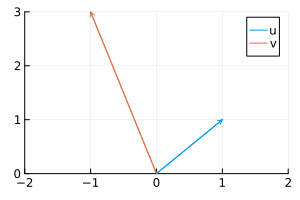

In [3]:
plot( [0; 1], [0; 1], arrow=2, label="u", xrange=(-2,2),yrange=(0,3))
plot!( [0; -1], [0; 3], arrow=2, label="v", size=(300,200))

# 3. Gram Schmidt

Gram Schmidt works as before.

#### **Example**

> Consider $f_1(x) = 1, f_2(x)=x, f_3(x)=x^2,$<br><br>
$\quad\quad$ the inner product $\quad <f,g>\ =\ \int_{-1}^1{\ f(x)\ g(x)\ dx},$<br><br>

$\quad\quad$ and the norm $\quad\quad\;\; \lVert f \rVert\quad\quad = \ \sqrt{ <f,f> }$

> We will need $\quad\quad\frac{1}{2}  \int_{-1}^{1}{\ x^n\ dx}\ =\quad \left\{ 
\begin{align}
    \frac{1}{n+1} & \quad &\text{ if } n \text{ is even}\\
    0             &       & \text{ if } n \text{ is odd} \;
\end{align}
\right.$

##### **Step 1**

> $\begin{align}
w_1 &= f_1 \Rightarrow w_1(x) = 1 \quad\quad\quad\quad\; \\
q_1 &= \frac{\sqrt{2}}{2}
\end{align}$

##### **Step 2**

> $\begin{align}
 & w_2 & = \quad& f_2 - \frac{<f_2,w_1>}{<w_1,w_1>}\ w_1 & \quad\quad\quad\\
&    & = \quad& \ x\ -\ \frac{ <x,1>}{<1,1>}\ 1 & \\
&   & = \quad& \ x. & \\
& q_2 & = \quad& \sqrt{\frac{3}{2}}\ x &  \quad\quad\quad\\
\end{align}$

##### **Step 3:**

> $\begin{align}
 & w_3 & = \quad& f_3 - \frac{<f_3,w_1>}{<w_1,w_1>}\ w_1 - \frac{<f_3,w_2>}{<w_2,w_2>}\ w_2 & \quad\quad\quad\\
&    & = \quad& \ x^2\ -\ \frac{ <x^2,1>}{<1,1>}\ 1  -\ \frac{ <x^2,x>}{<x,x>}\ x & \\
&   & = \quad& \ x^2 - \frac{1}{3}. & \\
& q_3 & = \quad& \sqrt{\frac{45}{8}}\ \left( x^2 - \frac{1}{3} \right) &  \quad\quad\quad\\
\end{align}$